# Init

In [1]:
import numpy as np
import logging
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%cd ..
%load_ext autoreload

import plotly.graph_objects as go

c:\Users\kepes\Projects\segmentation


In [6]:
%autoreload 2
from src.MapData import MapData
from src.LineFinder import LineFinder

from src.plotting_functions import plot_embedding, plot_single_variable_map

In [7]:
map_data = MapData()
map_data.get_metadata()
map_data.load_wavelenths()
map_data.load_all_data()
map_data.trim_spectra(64)

In [8]:
map_data.spectra = map_data.spectra[:10000,:].copy()

In [9]:
map_data.get_baseline(min_window_size=50, smooth_window_size=100)
map_data.align_baselines_with_spectra()
map_data.baseline_correct()

In [10]:
map_data.spectra

array([[ 56.71191906,  62.46886931,   6.21068604, ...,  85.15278024,
         64.45464704,  71.73934227],
       [ 71.5987908 ,  94.01354223,  43.71902921, ...,  86.27957303,
         35.9611802 ,  38.97758717],
       [ 54.76681572,  67.75774909,  23.39311951, ..., 105.66860988,
         85.71989501,  82.40457948],
       ...,
       [ 35.42857699,  44.47610592,   3.82401987, ...,  47.37822635,
         11.00962788,  53.62906692],
       [ 28.33433565,  45.05625172,  13.76079162, ...,  55.10060464,
          3.10478419,  44.08855979],
       [ 29.30591732,  42.53952218,  12.42571282, ...,  32.54867068,
         -2.32714765,  38.78206016]])

In [15]:
from random import randint

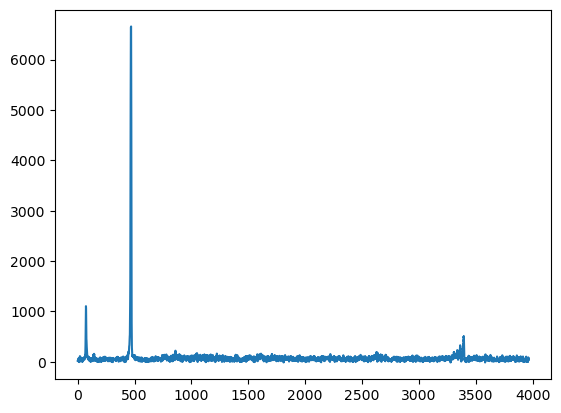

In [35]:
plt.plot(map_data.spectra[randint(0,map_data.spectra.shape[0]),:])

In [65]:
from skimage.restoration import denoise_wavelet
from pywt import wavelist

In [71]:
print(wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [83]:
spectrum = map_data.spectra[randint(0,map_data.spectra.shape[0])]

denoised_spectrum = denoise_wavelet(
    spectrum,
    sigma=30,
    wavelet='coif4',
    mode='soft', 
    # wavelet_levels=9,
    convert2ycbcr=False,
    # method='BayesShrink', 
    method='VisuShrink', 
    rescale_sigma=False
)

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=map_data.wvl,
        y=spectrum,
        name='baseline corrected'
    )
)
fig.add_trace(
    go.Scatter(
        x=map_data.wvl,
        y=denoised_spectrum,
        name='denoised'
    )
)
